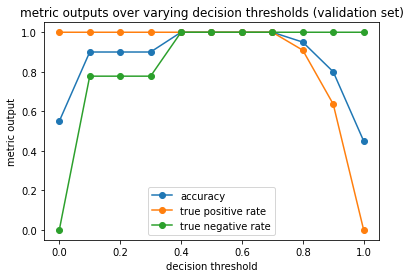

In [1]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from fairlearn.metrics import true_positive_rate, true_negative_rate
import matplotlib.pyplot as plt

# create synthethic data set
X, y = make_classification(random_state=1)

# split into train and test set
X_train, X_test, y_train, y_test = train_test_split(
  X, y, test_size=0.2, random_state=1)
# further split into train and validation set
X_train, X_val, y_train, y_val = train_test_split(
  X_train, y_train, test_size=0.25, random_state=3)

# train logistic regression classifier on training data
clf = LogisticRegression()
clf.fit(X_train, y_train)

# compute and plot validation set performance at different decision thresholds
y_score = clf.predict_proba(X_val)[:, 1]
thresholds = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
metrics = {'accuracy' : accuracy_score,
           'true positive rate' : true_positive_rate,
           'true negative rate' : true_negative_rate,
           }
for metric_name, metric_function in metrics.items():
  metric_output = [metric_function(y_true=y_val, y_pred=y_score>=t) for t in thresholds]
  plt.plot(thresholds, metric_output, 'o-', label=metric_name)
plt.title("metric outputs over varying decision thresholds (validation set)")
plt.xlabel("decision threshold")
plt.ylabel("metric output")
plt.legend()
plt.show()

In [2]:
for class_weight in [{0:10, 1:1}, {0:1, 1:10}, {0:1, 1:1}]:
    clf = LogisticRegression(class_weight=class_weight)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_val)
    print('class_weight {}'.format(class_weight))
    print('  tpr : {:.2f}'.format(true_positive_rate(y_true=y_val, y_pred=y_pred)))
    print('  tnr : {:.2f}'.format(true_negative_rate(y_true=y_val, y_pred=y_pred)))

class_weight {0: 10, 1: 1}
  tpr : 0.91
  tnr : 1.00
class_weight {0: 1, 1: 10}
  tpr : 1.00
  tnr : 0.78
class_weight {0: 1, 1: 1}
  tpr : 1.00
  tnr : 1.00
